In [1]:
import pandas as pd

In [2]:
tps = pd.read_csv(r"C:\Users\lawashburn\Documents\MSI_test\python_scripts\matched_52panc_52psc_data_sum60ppm_withtypes.csv")
tps.shape

(104, 143)

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
tps['CellType'] = LE.fit_transform(tps['CellType'])
tps=tps.iloc[: , 1:]
tps = tps.astype(float)
# Sample the data - 100k
X, y = tps.drop("CellType", axis=1), tps[["CellType"]].values.flatten()

from sklearn.preprocessing import QuantileTransformer

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

In [4]:
%%time
!pip install umap-learn
import umap  # pip install umap-learn

Wall time: 11.3 s


In [5]:
manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)
X_reduced.shape

(104, 2)

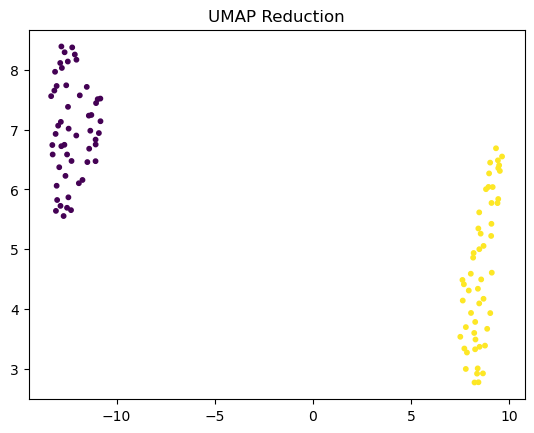

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=10);
plt.title("UMAP Reduction")
plt.show()

In [7]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',random_state=0).fit_transform(X)
X_embedded.shape

C:\Users\lawashburn\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(104, 2)

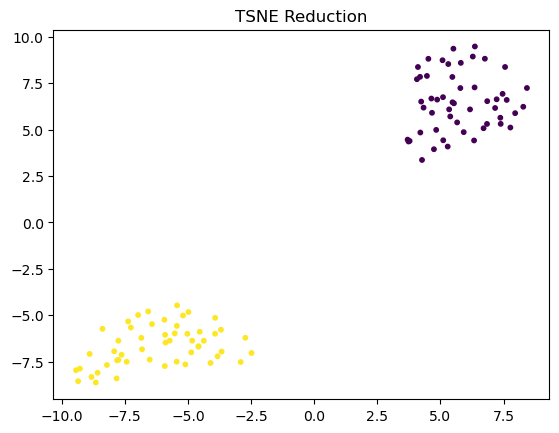

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=10);
plt.title("TSNE Reduction")
plt.show()

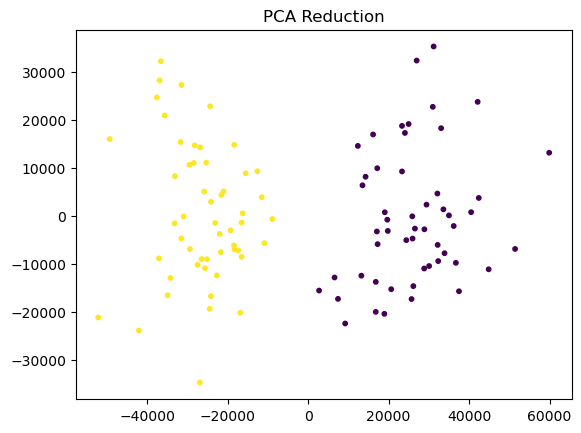

In [9]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X_pca =pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10);
plt.title("PCA Reduction")
plt.show()

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy: 1.0


array([[13,  0],
       [ 0,  8]], dtype=int64)

In [11]:
# Multi-layer Perceptron 
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier().fit(X_train, y_train)
y_pred3 = model2.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)
confusion_matrix(y_test, y_pred3)

Accuracy: 0.9523809523809523


array([[12,  1],
       [ 0,  8]], dtype=int64)

In [12]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
y_pred2= model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)
confusion_matrix(y_test, y_pred2)

Accuracy: 1.0


array([[13,  0],
       [ 0,  8]], dtype=int64)